In [128]:
# Useful site for looking at all the projection options:
# https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

In [129]:
# Modified from https://www.youtube.com/watch?v=4M2aiHvhr5Y&t=40s
# pip install cartopy

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature

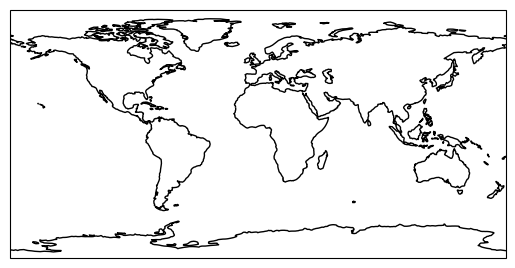

In [130]:
# Basic Map
map1 = plt.axes(projection=ccrs.PlateCarree())
map1.coastlines()

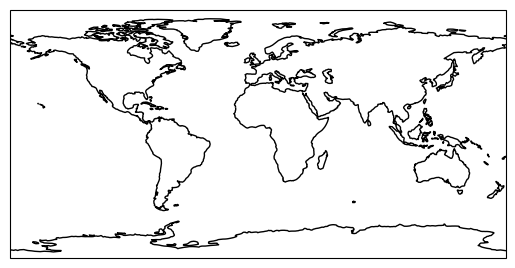

In [145]:
# Using fig gives us the ability to plot more than 1 map on one figure with subplots
fig = plt.figure()
map2 = fig.add_subplot(projection=ccrs.PlateCarree())
map2.coastlines()

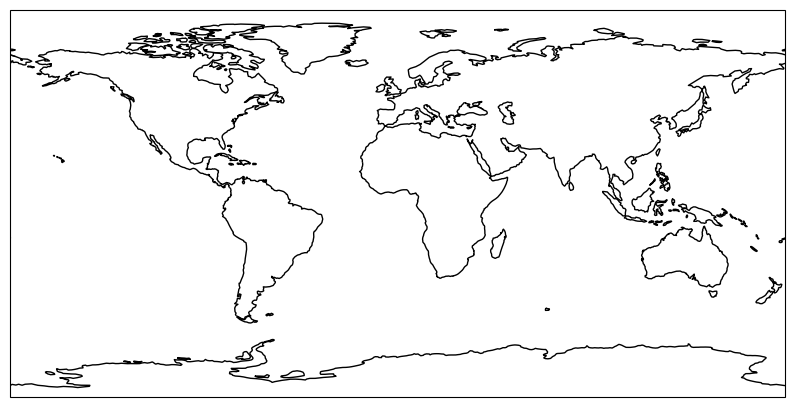

In [132]:
# You can adjust the figure size with figsize
fig = plt.figure(figsize=(10,10))
map3 = fig.add_subplot(projection=ccrs.PlateCarree())
map3.coastlines()

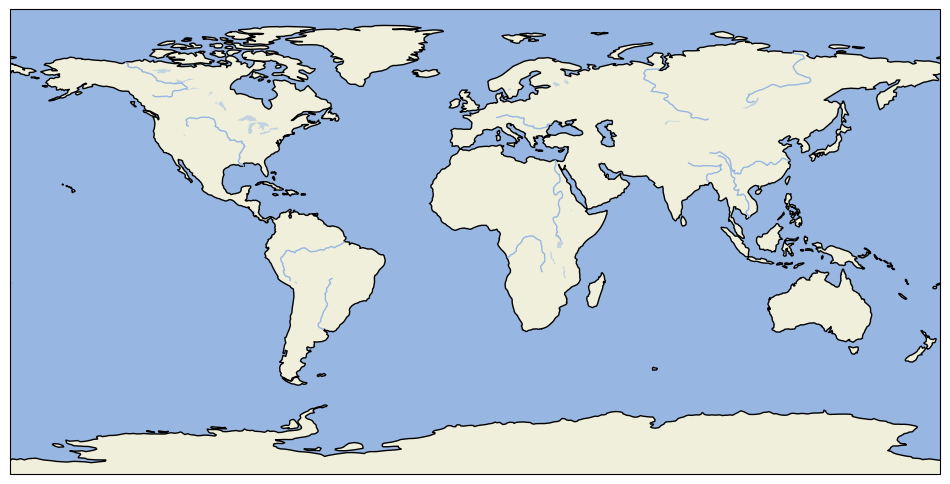

In [148]:
# This uses all the features that cartopy has, except "STATE"
# https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html

plt.figure(figsize=(12,12))
map4 = plt.axes(projection=ccrs.PlateCarree())
map4.add_feature(cfeature.LAND) # Adds green for land
map4.add_feature(cfeature.OCEAN) # Adds blue for water
#map4.add_feature(cfeature.COASTLINE) # Adds black border around coastline - map4.coastlines() is the same
#map4.coastlines() #Same as above
#map4.add_feature(cfeature.BORDERS, linestyle=":") # Adds lines for country borders
map4.add_feature(cfeature.LAKES, alpha=0.5) # Adds lakes
map4.add_feature(cfeature.RIVERS) # Adds rivers

#map4.stock_img() # Makes the map look more real

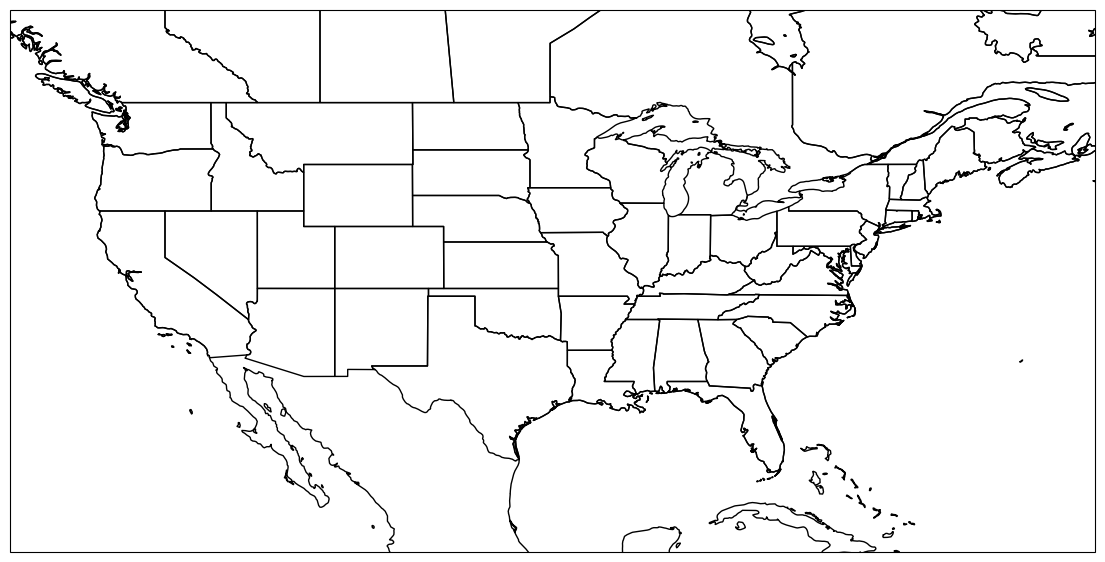

In [134]:
fig = plt.figure(figsize=(14,14))
map5 = plt.axes(projection=ccrs.PlateCarree())
map5.set_extent([-130,-60,20,55], ccrs.PlateCarree())
map5.add_feature(cfeature.STATES) # Shows the lines for each state in the US
map5.coastlines() # Without this line, it does not show Mexico


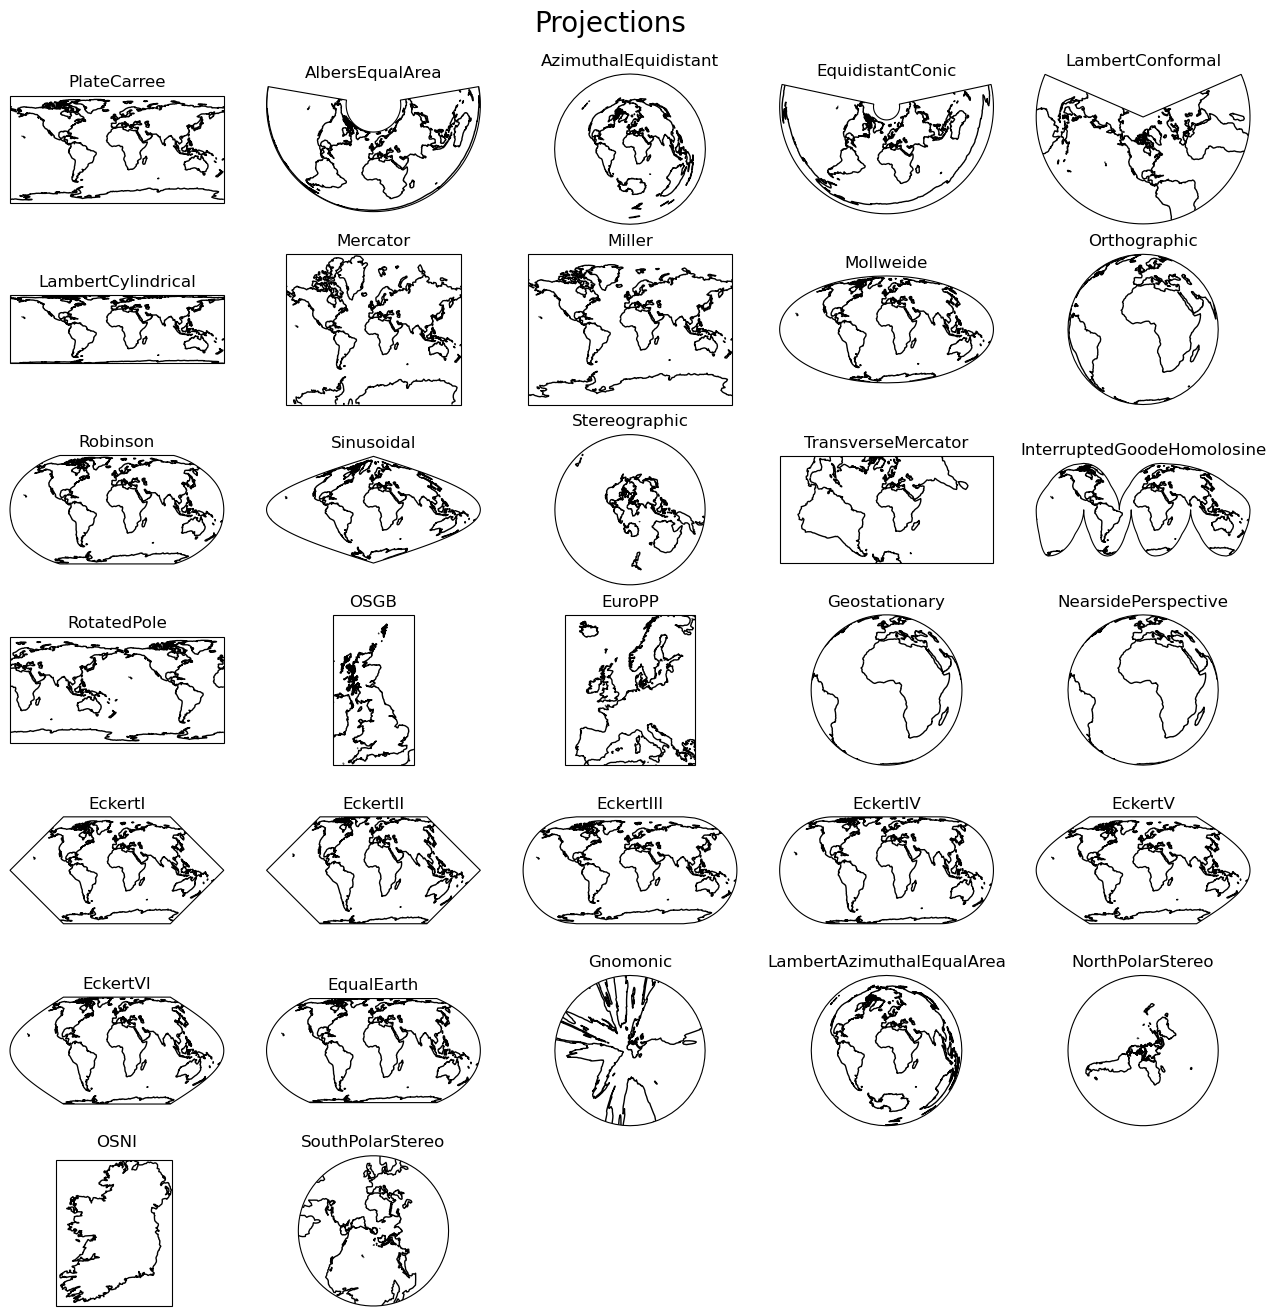

In [135]:
fig = plt.figure(figsize=(16,16))
fig.suptitle('Projections', fontsize=20, y=0.92)

projections = {'PlateCarree': ccrs.PlateCarree(), 'AlbersEqualArea': ccrs.AlbersEqualArea(), 
               'AzimuthalEquidistant': ccrs.AzimuthalEquidistant(), 'EquidistantConic': ccrs.EquidistantConic(), 
               'LambertConformal': ccrs.LambertConformal(), 'LambertCylindrical': ccrs.LambertCylindrical(), 
               'Mercator': ccrs.Mercator(), 'Miller': ccrs.Miller(), 'Mollweide': ccrs.Mollweide(), 
               'Orthographic': ccrs.Orthographic(), 'Robinson': ccrs.Robinson(), 'Sinusoidal': ccrs.Sinusoidal(), 
               'Stereographic': ccrs.Stereographic(), 'TransverseMercator': ccrs.TransverseMercator(), 
               'InterruptedGoodeHomolosine': ccrs.InterruptedGoodeHomolosine(),
               'RotatedPole': ccrs.RotatedPole(), 'OSGB': ccrs.OSGB(), 'EuroPP': ccrs.EuroPP(), 
               'Geostationary': ccrs.Geostationary(), 'NearsidePerspective': ccrs.NearsidePerspective(), 
               'EckertI': ccrs.EckertI(), 'EckertII': ccrs.EckertII(), 'EckertIII': ccrs.EckertIII(), 
               'EckertIV': ccrs.EckertIV(), 'EckertV': ccrs.EckertV(), 'EckertVI': ccrs.EckertVI(), 
               'EqualEarth': ccrs.EqualEarth(), 'Gnomonic': ccrs.Gnomonic(),
               'LambertAzimuthalEqualArea': ccrs.LambertAzimuthalEqualArea(), 
               'NorthPolarStereo': ccrs.NorthPolarStereo(), 'OSNI': ccrs.OSNI(), 
               'SouthPolarStereo': ccrs.SouthPolarStereo()}

for index, projection in enumerate(projections.items()):
    ax = fig.add_subplot(7, 5, index+1, projection=projection[1])
    ax.coastlines()
    ax.set_title(projection[0])

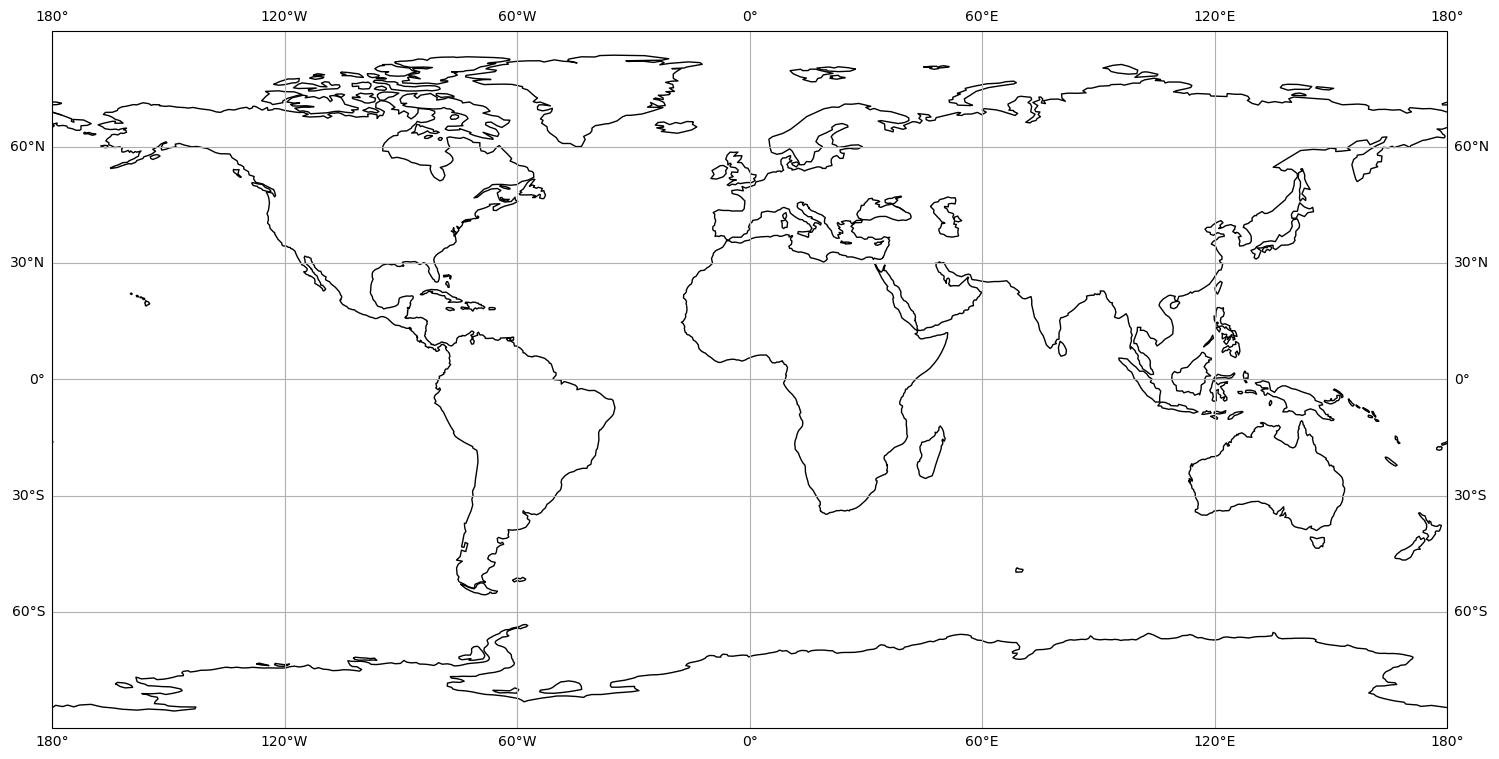

In [136]:
# Adding gridlines
plt.figure(figsize=(18,12))
map6 = plt.axes(projection=ccrs.PlateCarree())
grid_lines = map6.gridlines(draw_labels=True) # Draws the grid
map6.coastlines()

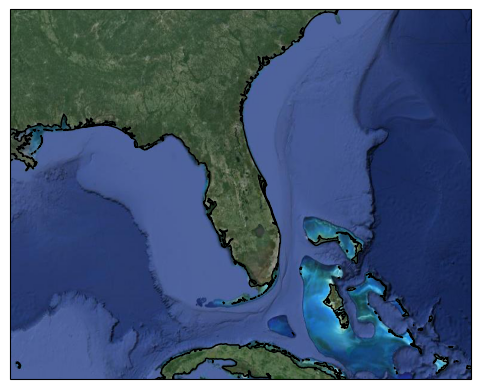

In [137]:
# Using map tiles
# https://scitools.org.uk/cartopy/docs/latest/gallery/web_services/image_tiles.html

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles

def tileMap():
    tiler = GoogleTiles(style="satellite")
    mercator = tiler.crs

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=mercator)
    ax.set_extent([-90, -73, 22, 34], crs=ccrs.PlateCarree())

    ax.add_image(tiler, 6)

    ax.coastlines('10m')
    plt.show()

tileMap()


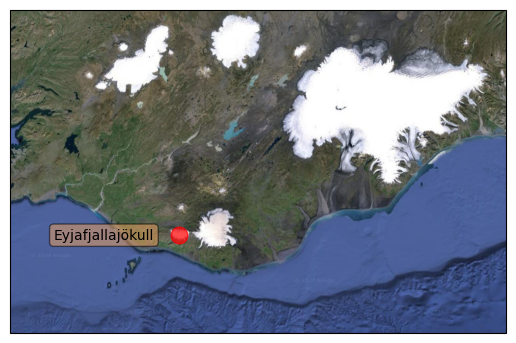

In [138]:
# https://scitools.org.uk/cartopy/docs/latest/gallery/scalar_data/eyja_volcano.html

import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

def useGoogleTilesPlotTerrain():
    # Create a background image tile.
    google_terrain = cimgt.GoogleTiles(style="satellite")

    fig = plt.figure()

    # Create a GeoAxes in the tile's projection.
    ax = fig.add_subplot(1, 1, 1, projection=google_terrain.crs)

    # Limit the extent of the map to a small longitude/latitude range.
    ax.set_extent([-22, -15, 63, 65], crs=ccrs.Geodetic())

    # Add the tile data at zoom level 8.
    ax.add_image(google_terrain, 8)

    # Add a marker for the Eyjafjallajökull volcano.
    ax.plot(-19.613333, 63.62, marker='o', color='red', markersize=12,
            alpha=0.7, transform=ccrs.Geodetic())

    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
    geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text 25 pixels to the left of the volcano.
    ax.text(-19.613333, 63.62, 'Eyjafjallajökull',
            verticalalignment='center', horizontalalignment='right',
            transform=text_transform,
            bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
    plt.show()

useGoogleTilesPlotTerrain()

In [139]:
def makeCircle():
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    return mpath.Path(verts * radius + center)

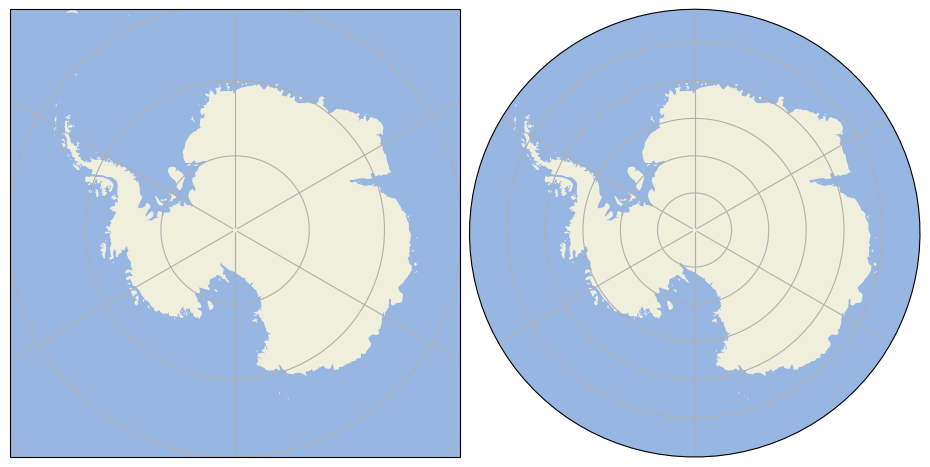

In [140]:
#################
#  SOUTH POLE   #
#################

import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plotSouthPole2Maps():
    fig = plt.figure(figsize=[10, 5])
    leftMap = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
    rightMap = fig.add_subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(),
                          sharex=leftMap, sharey=leftMap)
    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)

    # Limit the map to -60 degrees latitude and below.
    leftMap.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    leftMap.add_feature(cfeature.LAND)
    leftMap.add_feature(cfeature.OCEAN)

    leftMap.gridlines()
    rightMap.gridlines()

    rightMap.add_feature(cfeature.LAND)
    rightMap.add_feature(cfeature.OCEAN)

    rightMap.set_boundary(makeCircle(), transform=rightMap.transAxes)

    plt.show()

plotSouthPole2Maps()

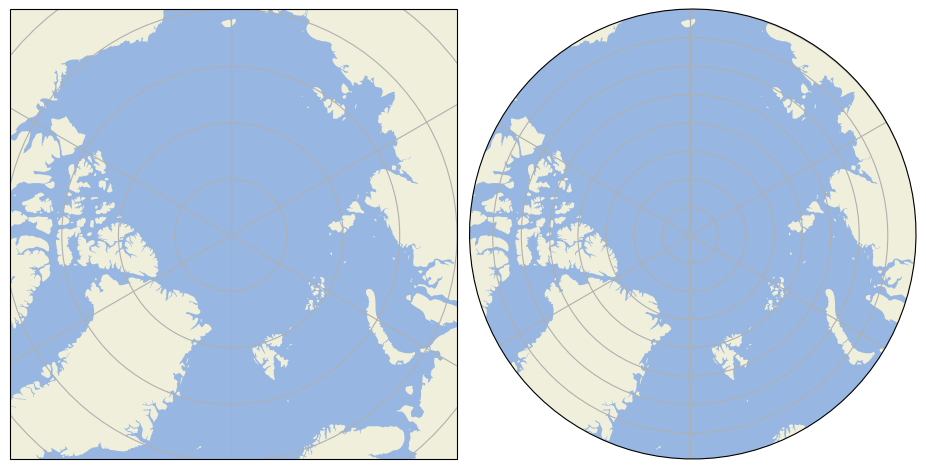

In [152]:
#################
#  NORTH POLE   #
#################

import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

MAXLONGITUDE = 180
MINLONGITUDE = -180
NORTHPOLE = 90

def plotNorthPole2Maps():
    fig = plt.figure(figsize=[10, 5])

    # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html
    # ADD_SUBPLOT: NROWS, NCOLS, INDEX, **KWARGS
        # 1 for nrows means there will only be one row of maps
        # 2 for ncols means there will be 2 columns of maps
        # the index means that which position (1 or 2) will the map appear
        # leftMap is in position 1; rightMap is in position 2
    leftMap = fig.add_subplot(1, 2, 1, projection=ccrs.NorthPolarStereo())
    rightMap = fig.add_subplot(1, 2, 2, projection=ccrs.NorthPolarStereo(),
                          sharex=leftMap, sharey=leftMap)
    
    # Adjusts the margins around the plots (as a fraction of the width or height)
    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)

    # Format for set_extent is [minimum longitude, maximum longitude, minimum latitude, maximum latitude]
        # -180 to 180 shows all the way around the globe
        # 70 seems like a good lower boundary; 90 is the north pole
    leftMap.set_extent([MINLONGITUDE, MAXLONGITUDE, 70, NORTHPOLE], ccrs.PlateCarree())

    leftMap.add_feature(cfeature.OCEAN)
    rightMap.add_feature(cfeature.OCEAN)

    leftMap.add_feature(cfeature.LAND)
    rightMap.add_feature(cfeature.LAND)
    
    leftMap.gridlines()
    rightMap.gridlines()
    
    rightMap.set_boundary(makeCircle(), transform=rightMap.transAxes)

    plt.show()

plotNorthPole2Maps()